In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score,classification_report
import seaborn as sns

In [104]:
# load dataset
train = pd.read_csv('mnist_train.csv')
test = pd.read_csv('mnist_test.csv')

train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
x_train=train.iloc[:,1:].values
x_test=test.iloc[:,1:].values
y_train=train['label'].values
y_test=test['label'].values
x_train[6,:].shape

(784,)

In [106]:
# Preprocess the data
x_train = x_train.reshape((-1, 28, 28, 1)) / 255.0  # Reshape and normalize training images
x_test = x_test.reshape((-1, 28, 28, 1)) / 255.0    # Reshape and normalize test images
y_train = keras.utils.to_categorical(y_train, num_classes=10)  # Convert training labels to one-hot encoded vectors
y_test = keras.utils.to_categorical(y_test, num_classes=10)    # Convert test labels to one-hot encoded vectors

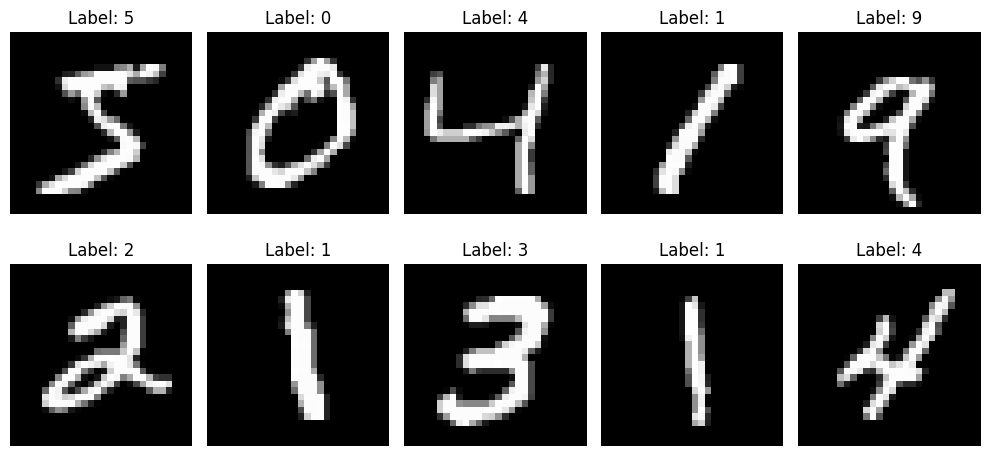

In [107]:
# Visualize sample images from the dataset
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()
for i in range(10):
    axes[i].imshow(x_train[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Label: {np.argmax(y_train[i])}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

In [108]:
# Build the CNN model
model = Sequential()

model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)))  # 8 filters of size 3x3, ReLU activation function
model.add(MaxPooling2D((2, 2)))  # Max pooling with pool size 2x2

model.add(Conv2D(16, (3, 3), activation='relu'))  # 16 filters of size 3x3, ReLU activation
model.add(MaxPooling2D((2, 2)))  # Max pooling

model.add(Flatten())  # Flatten the output from 2D to 1D

model.add(Dense(30, activation='relu'))  # Fully connected layer with 30 units, ReLU activation
model.add(Dense(10, activation='softmax'))  # Output layer with 10 units (classes), softmax activation

In [109]:
model.summary() # print the archticture of model

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 400)               0         
                                                                 
 dense_6 (Dense)             (None, 30)               

                                                                 
Total params: 13588 (53.08 KB)
Trainable params: 13588 (53.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [110]:
# print trainable parameters of model
for i in model.layers:
    print(f"Layer {i.name} : {i.count_params()} trainable parameters")
    print('----------------------------------------------')

Layer conv2d_6 : 80 trainable parameters
----------------------------------------------
Layer max_pooling2d_6 : 0 trainable parameters
----------------------------------------------
Layer conv2d_7 : 1168 trainable parameters
----------------------------------------------
Layer max_pooling2d_7 : 0 trainable parameters
----------------------------------------------
Layer flatten_3 : 0 trainable parameters
----------------------------------------------
Layer dense_6 : 12030 trainable parameters
----------------------------------------------
Layer dense_7 : 310 trainable parameters
----------------------------------------------


In [111]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [112]:
# Train the model
model.fit(x_train, y_train, batch_size=300, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
200/200 [==============================] - 8s 35ms/step - loss: 0.6443 - accuracy: 0.8207 - val_loss: 0.1844 - val_accuracy: 0.9471
Epoch 2/5
200/200 [==============================] - 7s 35ms/step - loss: 0.1580 - accuracy: 0.9538 - val_loss: 0.1186 - val_accuracy: 0.9651
Epoch 3/5
200/200 [==============================] - 7s 35ms/step - loss: 0.1083 - accuracy: 0.9678 - val_loss: 0.0830 - val_accuracy: 0.9746
Epoch 4/5
200/200 [==============================] - 7s 37ms/step - loss: 0.0875 - accuracy: 0.9739 - val_loss: 0.0737 - val_accuracy: 0.9773
Epoch 5/5
200/200 [==============================] - 7s 36ms/step - loss: 0.0740 - accuracy: 0.9779 - val_loss: 0.0733 - val_accuracy: 0.9759


In [113]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [114]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

313/313 [==============================] - 1s 4ms/step - loss: 0.0733 - accuracy: 0.9759
Test Loss: 0.0733
Test Accuracy: 0.9759


In [115]:
print(y_pred.shape,y_test.shape)

(10000, 10) (10000, 10)


In [116]:
# convert from One Hot Encoding to int values that represent int labels
num_of_classes = y_test.shape[1]
print('Number of classes : ' , num_of_classes)
true_labels = []
for label in y_test:
    true_label = np.argmax(label)
    true_labels.append(true_label)
print(true_labels[:30])

pred_labels = []
for label in y_pred:
    true_label = np.argmax(label)
    pred_labels.append(true_label)
#print(set(true_labels))
print(pred_labels[:30])

Number of classes :  10
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1]
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1]


In [117]:
precision = precision_score (true_labels,pred_labels , average='macro')
recall = recall_score(true_labels,pred_labels , average='macro')
f1 = f1_score(true_labels,pred_labels,average='macro')

print('precision_score : ' , precision )
print('recall_score : ' , recall )
print('f1_score : ' , f1 )

precision_score :  0.9762964058702611
recall_score :  0.9757327272264813
f1_score :  0.9758580506960091


[[ 974    1    1    0    0    1    1    1    1    0]
 [   0 1132    1    1    0    0    0    0    1    0]
 [   7   12  997    4    2    0    0    8    2    0]
 [   1    0    2  997    0    4    0    4    2    0]
 [   1    6    0    0  968    0    3    1    1    2]
 [   3    0    0    7    0  876    2    1    2    1]
 [  11    4    0    0    4    5  933    0    1    0]
 [   1    6   12    4    2    1    0  998    2    2]
 [  13    2    5    7    3    2    0    7  931    4]
 [   8    5    0    8   12    8    0   11    4  953]]


<AxesSubplot: >

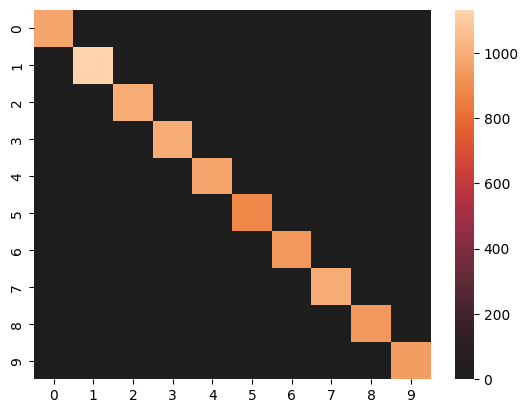

In [118]:
cm = confusion_matrix(true_labels,pred_labels)
print(cm)

sns.heatmap(cm,center=True)

In [119]:
repo = classification_report(true_labels,pred_labels)
print(repo)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.97      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.99      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.97      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.98      0.96      0.97       974
           9       0.99      0.94      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

